# The Goal
We will get the stock data of a company and analyze it's returns. We will see which distribution suits it approximately. the yfinance package will help us retrieve the stock data from yahoo finance. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [109]:
#1. get amazon stock data


start_date = '2020-05-01'
end_date = '2023-05-01'
tickr = 'GOOGL'

stock1 = yf.download(tickr,start_date,end_date)

[*********************100%***********************]  1 of 1 completed


After importing the necessary packages we have downloaded our stock data and stored it as 'stock1'. We picked Google's stock data over the last 5 years.
Now we will take a look at the data.

In [110]:
print(type(stock1))
stock1.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-01,66.204498,67.571503,65.483002,65.865997,65.865997,48872000
2020-05-04,65.406502,66.223503,64.800499,66.144997,66.144997,30806000
2020-05-05,66.875000,68.550499,66.751503,67.450996,67.450996,39666000
2020-05-06,67.900002,68.434502,67.256500,67.271500,67.271500,31732000
2020-05-07,68.065498,68.800003,67.626999,68.463997,68.463997,30652000


We can see that the stock data gets stored as a pandas dataframe which is convinient. We also take a look at the top 5 records. Let us now take a closer look at the closing prices.

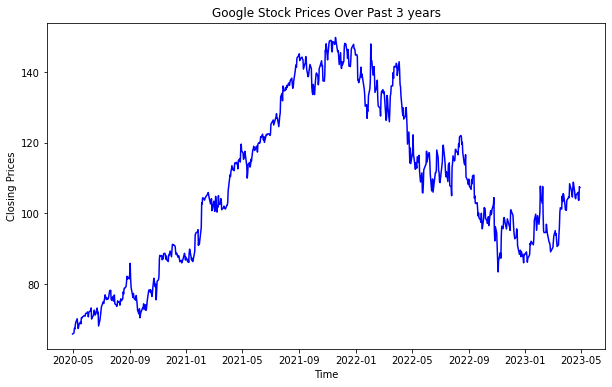

The first and last stock price in our data are as follow: First Price = $65.87 and Last Price = $107.34


In [111]:
plt.figure(figsize=(10,6))
plt.plot(stock1['Adj Close'],color='blue')
plt.xlabel("Time")
plt.ylabel("Closing Prices")
plt.title("Google Stock Prices Over Past 3 years")
plt.show()

print("The first and last stock price in our data are as follow: First Price = ${:.2f} and Last Price = ${:.2f}"
      .format(stock1['Adj Close'][0],stock1['Adj Close'][-1]))



## Simple Returns


For simple returns we have the following formula: $S_t$ is the stock price at time t 

$$Simple Returns = \frac{S_t - S_{t-1}}{S_{t-1}} = \frac{S_t}{S_{t-1}}-1$$

$$ {S_t} = {S_0}[1+{r_s}]^{t} $$

$ r_s $ is the average simple return rate, t is the time period. 

In [141]:

stock1['Simple Daily Returns'] = stock1['Adj Close']/stock1['Adj Close'].shift(1) - 1

simple_returns_mean = stock1['Simple Daily Returns'].mean()

print("The mean of the daily simple return is = {:2f}".format(simple_returns_mean))
print("Calculated final price ${:.2f}".format(stock1['Adj Close'][0]*(1+simple_returns_mean)**(len(stock1))))
print("Observed final price ${:.2f}".format(stock1['Adj Close'][-1]))

The mean of the daily simple return is = 0.000849
Calculated final price $124.91
Observed final price $107.34


So why don't these two values match? For this let us now divert our attention to the simple daily returns.

In [115]:
stock1['Simple Daily Returns'].describe()

#stock1['Simple Daily Returns'].describe().loc['mean']

count    753.000000
mean       0.000849
std        0.020032
min       -0.091405
25%       -0.009607
50%        0.001088
75%        0.012101
max        0.076557
Name: Simple Daily Returns, dtype: float64

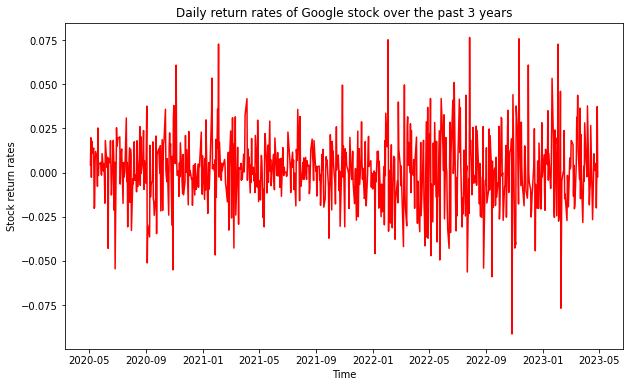

In [118]:
plt.figure(figsize=(10,6))
# plt.subplot(1, 2, 1)


plt.plot(stock1['Simple Daily Returns'],color='red')
plt.xlabel("Time")
plt.ylabel("Stock return rates")
plt.title("Daily return rates of Google stock over the past 3 years")

# plt.subplot(1, 2, 2)

# plt.plot(stock1['Simple Daily Returns'][:-253],color='red')
# plt.xlabel("Time")
# plt.ylabel("Stock return rates")
# plt.title("Daily return rates of Google stock over the past 1 year")

# plt.tight_layout()
plt.show()

Above we see the daily return rates over the past 5 years and 1 year. **What can we infer from here?**
The rates are volatile and appear to be concentrated around the mean with some outliers every now and then. 
Perhaps histograms will shed more light!

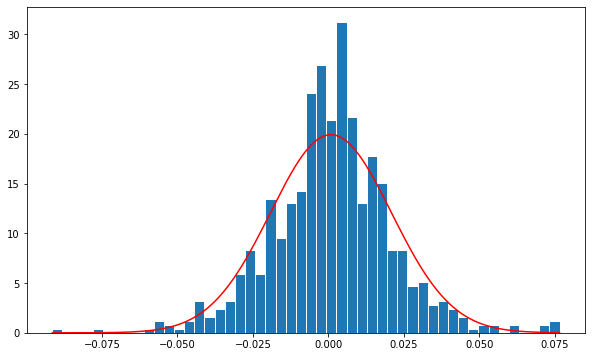

In [119]:
from scipy.stats import norm

mu, sigma = stock1['Simple Daily Returns'].describe().loc['mean'], (stock1['Simple Daily Returns'].describe().loc['std'])
plt.figure(figsize=(10,6))
plt.hist(stock1['Simple Daily Returns'], bins=50, edgecolor = 'w', density=True)
overlay = np.linspace(-0.091405,0.076557,753)
p=norm.pdf(overlay, mu, sigma)
plt.plot(overlay,p,color='red')
plt.show()

It appears that the daily stock returns bear a resemblence to the normal distribution(approx.) so it would not be entirely wrong to model simple returns based on normal distribution. Since the **product of normally distributed
variables is not normally distributed**, we see mismatch in the observed and calculated final stock price.

## Log Returns
Here we define
$$ {r_{t}} = \frac{{S_t}-{S_{t-1}}}{S_{t-1}} = \frac{S_t}{S_{t-1}}-1$$
where $r_{t}$ is the log return.

$$ \implies 1+{r_t} = \frac{S_t}{S_{t-1}}$$
$$ \ln(1+{r_t}) = \ln[{\frac{S_t}{S_{t-1}}}] \dots (1)$$

Also
$$ {S_t} = {S_0}(1+{r_1})(1+{r_2})\dots(1+{r_t})$$
$$ \frac{S_t}{S_0} = (1+{r_1})(1+{r_2})\dots(1+{r_t})$$
taking $\ln$ on both sides:
$$ \ln[\frac{S_t}{S_0}] = \ln[(1+{r_1})(1+{r_2})\dots(1+{r_t})]$$
$$ \ln[\frac{S_t}{S_0}] = \ln(1+{r_1}) + \ln(1+{r_2}) \dots +\ln(1+{r_t})$$

This shows that taking log of the returns makes them additive, which is not the case for simple returns.

In [142]:
stock1['log returns'] = np.log(stock1['Adj Close']/stock1['Adj Close'].shift(1))
log_mean = stock1['log returns'].mean()
print(log_mean)
stock1['log returns'].describe()

0.0006485776869425128


count    753.000000
mean       0.000649
std        0.020029
min       -0.095856
25%       -0.009654
50%        0.001087
75%        0.012028
max        0.073768
Name: log returns, dtype: float64

Now we will plot the log returns

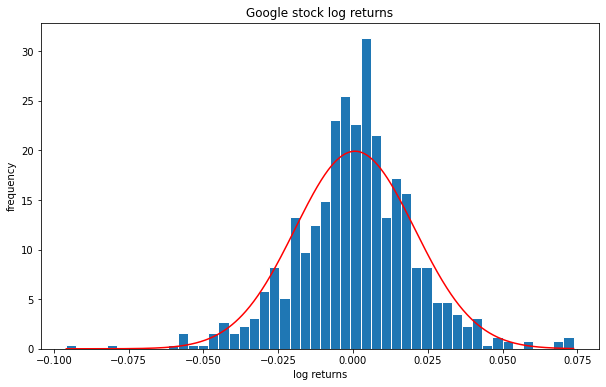

In [139]:

plt.figure(figsize=(10,6))
plt.hist(stock1['log returns'], bins=50, edgecolor = 'w', density=True)
overlay = np.linspace(-0.095856,0.073768,753)
mu, sigma = 0.000649, 0.020029
p=norm.pdf(overlay, mu, sigma)
plt.plot(overlay,p,color='red')
plt.xlabel("log returns")
plt.ylabel("frequency")
plt.title("Google stock log returns")
plt.show()

In [138]:
print(stock1["Adj Close"][0])
print(stock1["Adj Close"][-1])
stock1['Adj Close'][0]*((1+log_mean)**(753))

65.86599731445312
107.33999633789062


107.32300496556682

Here we can see that the observed and calculted final stock prices match, which wasn't the case with simple returns. The log returns also resembles a normal distribution and since **the sum of normally distributed variables is also normally distributed**, the observed and calculated values match. This, along with their additive property, makes log returns more preferable as compared to simple returns.  

By simply looking an the distribution plots we can't fix the distribution. A better way to judge would be to look at perhaps the **Q-Q plot**.

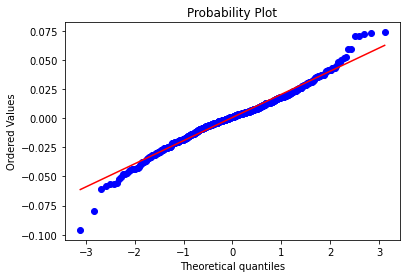

In [152]:
import scipy.stats as stats
import pylab

stats.probplot(stock1['log returns'].dropna(),dist='norm',plot = pylab)
pylab.show()

We see that the log returns doesn't exactly match the normal distribution. This is due to some outliers present.
So the normal distribution is a close approximation for modeling stock price returns.